## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [59]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [60]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date" -- **set to "Timestamp" instead as per above instructions**
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("./Resources/bitstamp.csv"), 
                      index_col="Timestamp",
                      parse_dates=True,
                      infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [61]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [62]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("./Resources/coinbase.csv"), 
                      index_col="Timestamp",
                      parse_dates=True,
                      infer_datetime_format=True)

In [63]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [64]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.dropna()
bitstamp = bitstamp.fillna(0)

#confirm there are no more missing values
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [65]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:,"Close"]= bitstamp.loc[:,"Close"].str.replace("$","")

# confirm "$" are gone
bitstamp.head()

# check current datatypes
bitstamp.dtypes

/var/folders/p7/qyjqgqq91qv429mf60r_pkv00000gn/T/ipykernel_19707/1814616043.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:,"Close"]= bitstamp.loc[:,"Close"].str.replace("$","")


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [66]:
# Convert the Close data type to a float

# make change
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")

# check new datatype
bitstamp.dtypes

/var/folders/p7/qyjqgqq91qv429mf60r_pkv00000gn/T/ipykernel_19707/2866717293.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [67]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

472

In [68]:
# Drop duplicates
bitstamp = bitstamp.drop_duplicates()
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [69]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.dropna()

# For the coinbase DataFrame, replace missing values
coinbase = coinbase.fillna(0)

# count the number of missing values
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [70]:
# remove dollar sign in coinbase data for close
coinbase.loc[:,"Close"]= coinbase.loc[:,"Close"].str.replace("$","")

# check the data type
coinbase.dtypes

/var/folders/p7/qyjqgqq91qv429mf60r_pkv00000gn/T/ipykernel_19707/3603204181.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:,"Close"]= coinbase.loc[:,"Close"].str.replace("$","")


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [71]:
# change close to float datatype
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes

/var/folders/p7/qyjqgqq91qv429mf60r_pkv00000gn/T/ipykernel_19707/3149720815.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [72]:
# drop duplicate data from coinbase
coinbase = coinbase.drop_duplicates()
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [73]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,"Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [74]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,"Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [75]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [76]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot: title={'center': 'Bitstamp Prices'}, xlabel='Timestamp'>

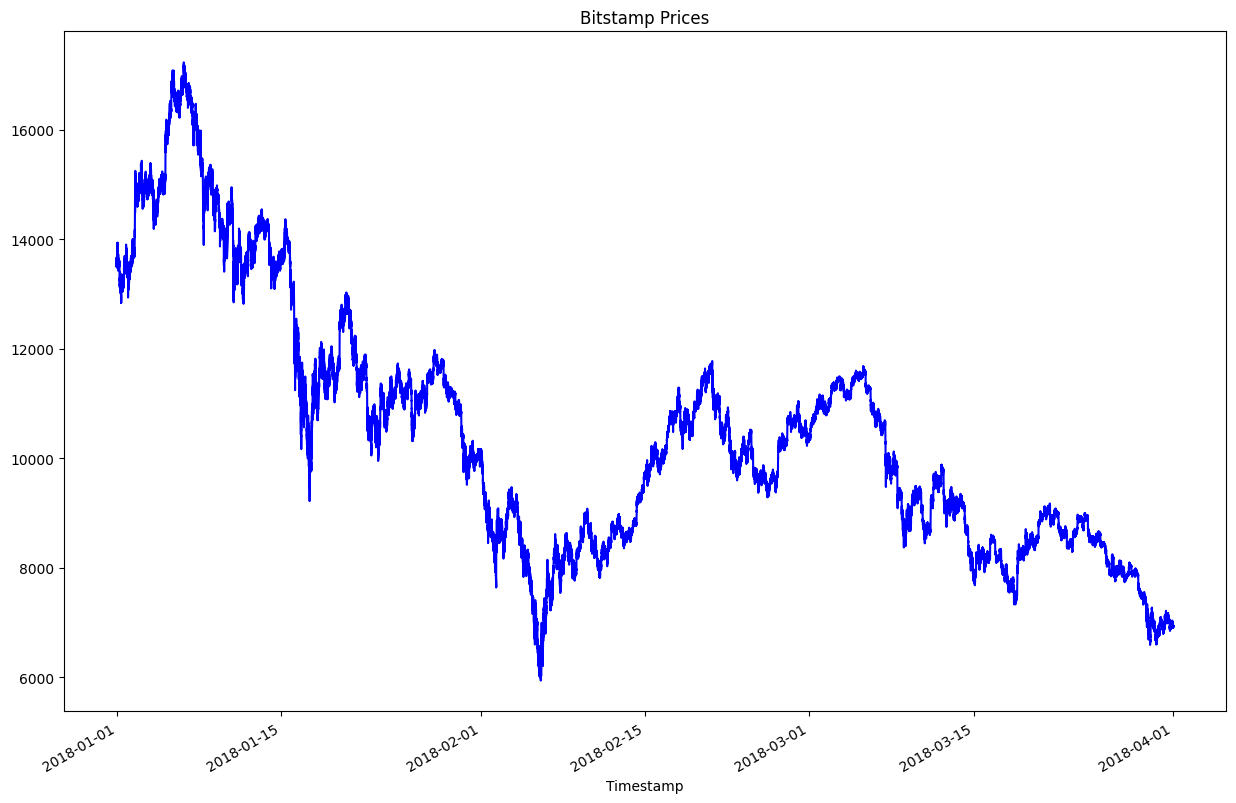

In [77]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(kind='line', figsize=(15,10), color="blue",  title="Bitstamp Prices")

<AxesSubplot: title={'center': 'Coinbase Prices'}, xlabel='Timestamp'>

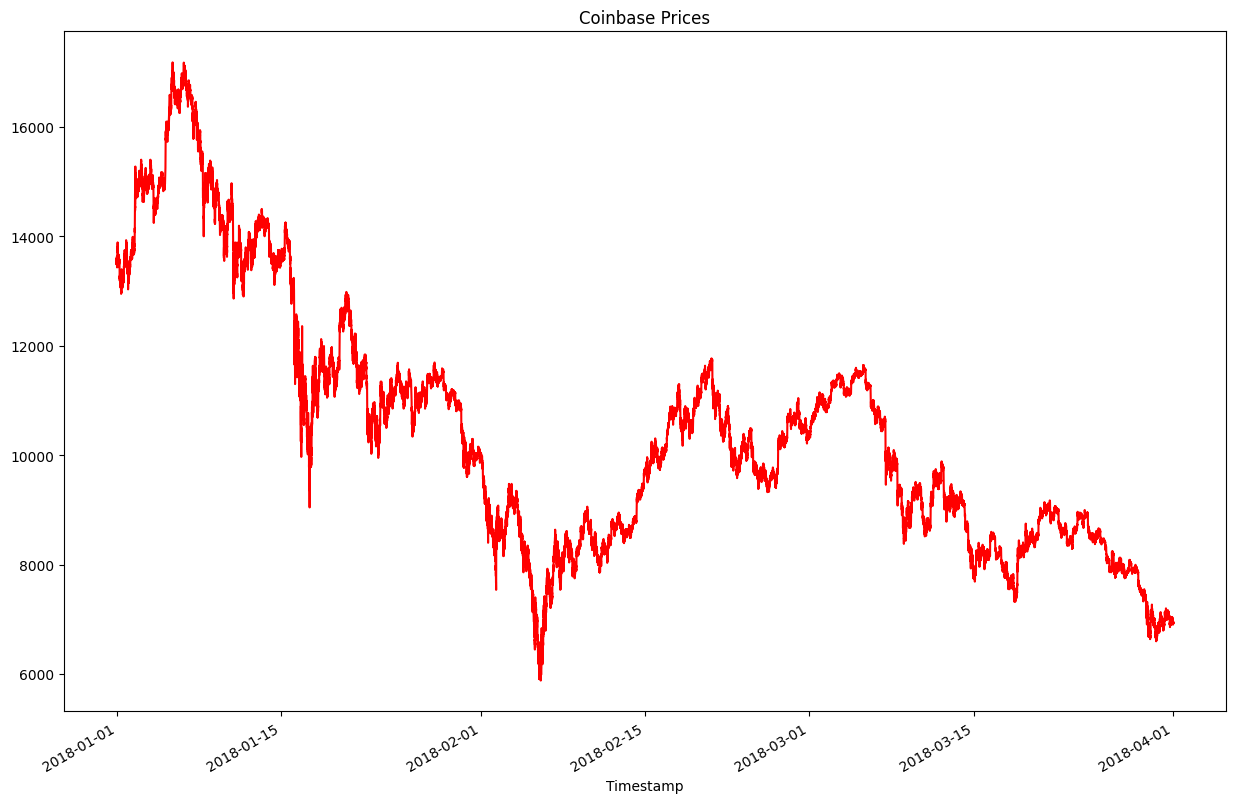

In [78]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(kind='line', figsize=(15,10), color="red",  title="Coinbase Prices")

<AxesSubplot: title={'center': 'Bitstamp vs Coinbase Prices'}, xlabel='Timestamp'>

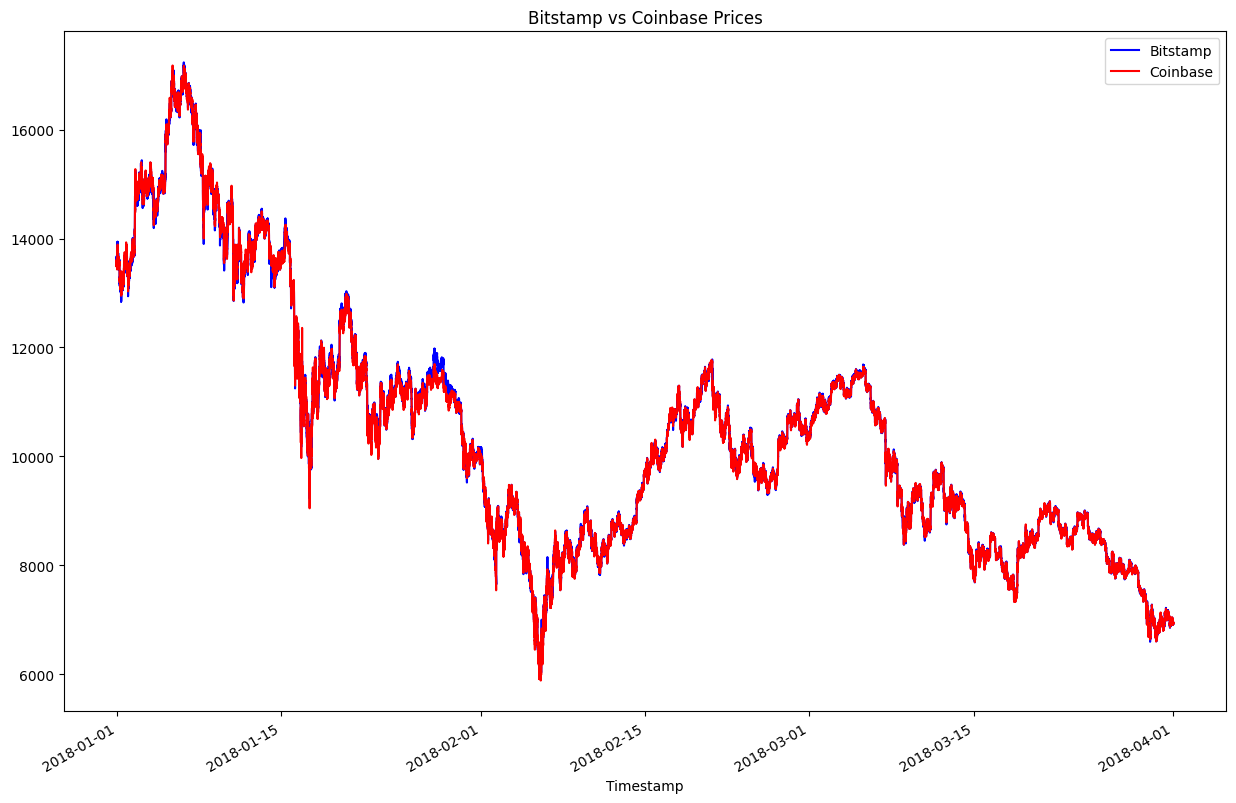

In [79]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, kind='line', figsize=(15,10), color="blue",  title="Bitstamp vs Coinbase Prices", label="Bitstamp")
coinbase_sliced.plot(legend=True, kind='line', figsize=(15,10), color="red",  label="Coinbase")

<AxesSubplot: title={'center': 'Bitstamp vs Coinbase Prices'}, xlabel='Timestamp'>

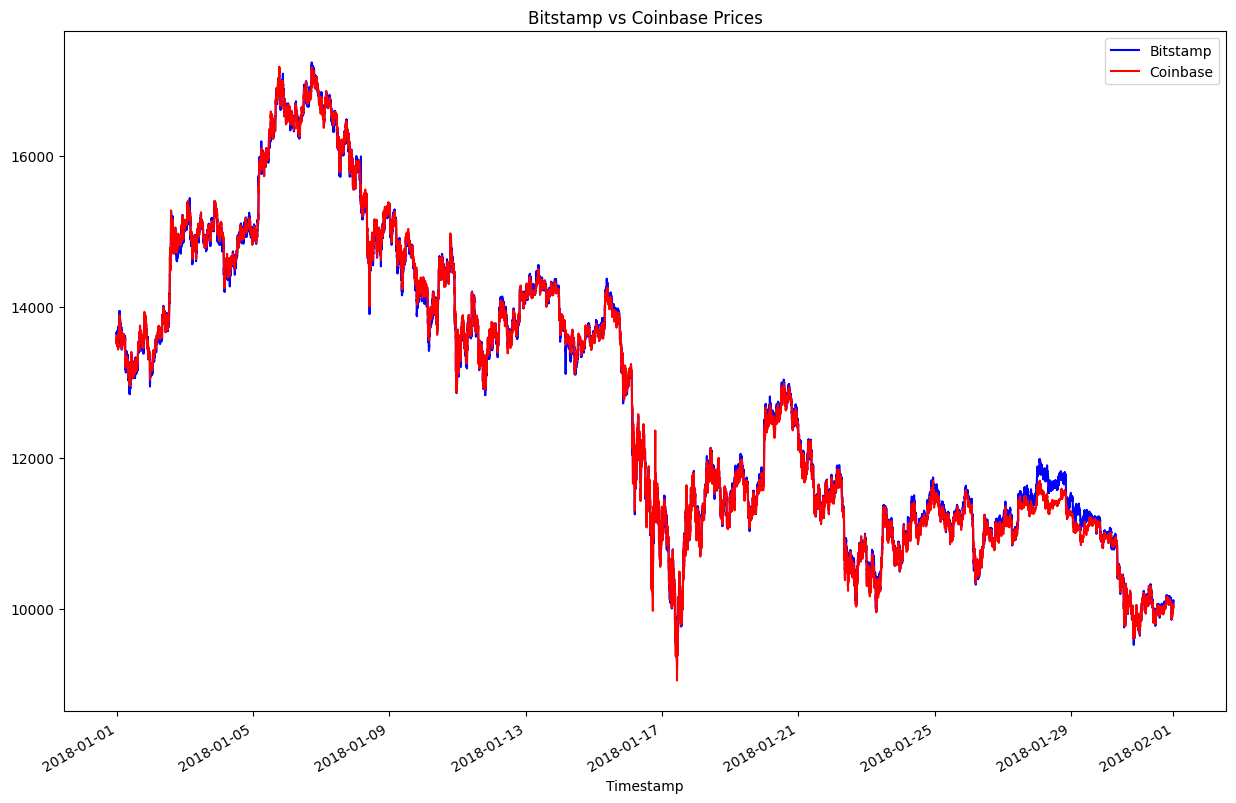

In [80]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01' : '2018-01-31'].plot(legend=True, kind='line', figsize=(15,10), color="blue",  title="Bitstamp vs Coinbase Prices", label="Bitstamp")
coinbase_sliced.loc['2018-01-01' : '2018-01-31'].plot(legend=True, kind='line', figsize=(15,10), color="red",  label="Coinbase")

<AxesSubplot: title={'center': 'Bitstamp vs Coinbase Prices'}, xlabel='Timestamp'>

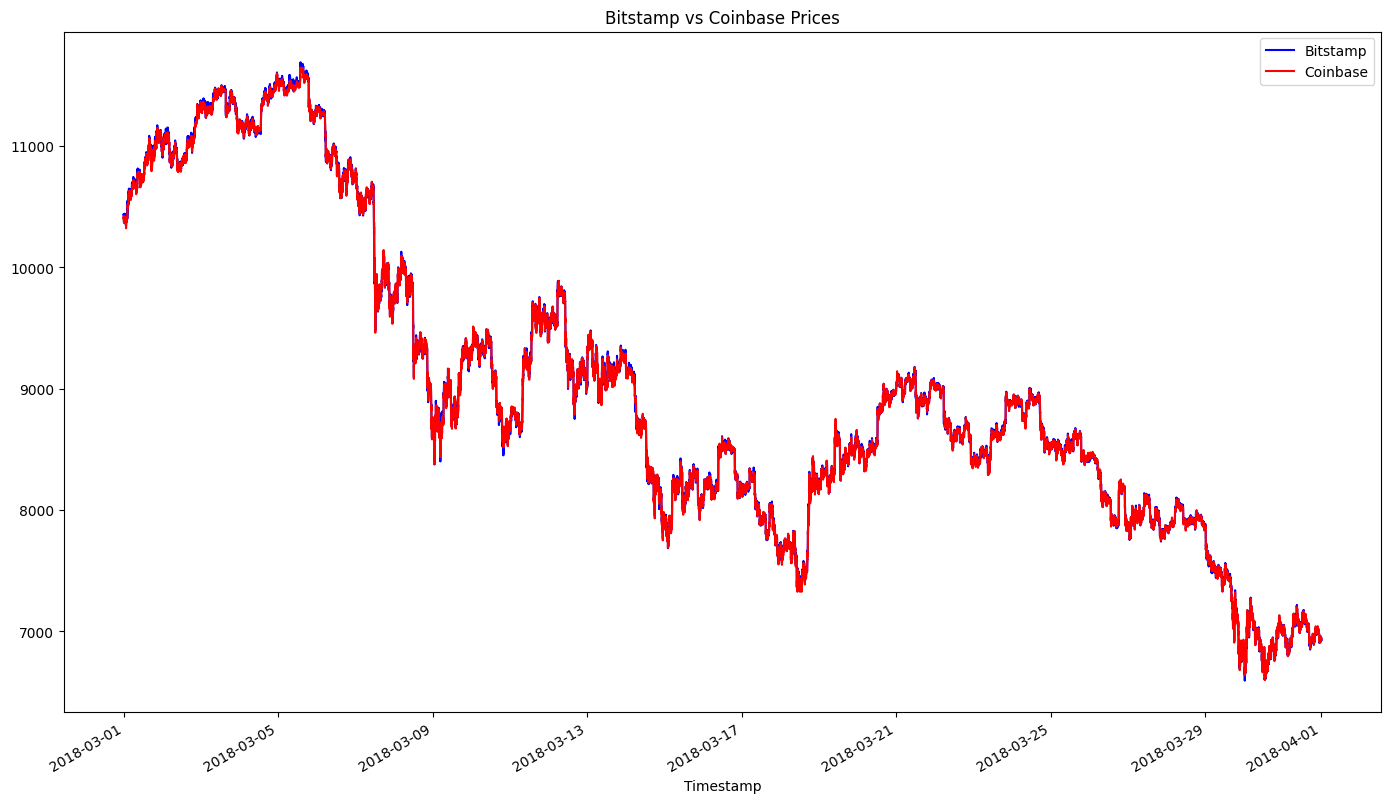

In [81]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01' : '2018-03-31'].plot(legend=True, kind='line', figsize=(17,10), color="blue",  title="Bitstamp vs Coinbase Prices", label="Bitstamp")
coinbase_sliced.loc['2018-03-01' : '2018-03-31'].plot(legend=True, kind='line', figsize=(17,10), color="red",  label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The degree of spread between the two exchanges certainly changed between the time period of January 2018 and March 2018. It seems to have decreased in that time.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot: title={'center': 'Bitstamp vs Coinbase Prices on January 10th, 2018'}, xlabel='Timestamp'>

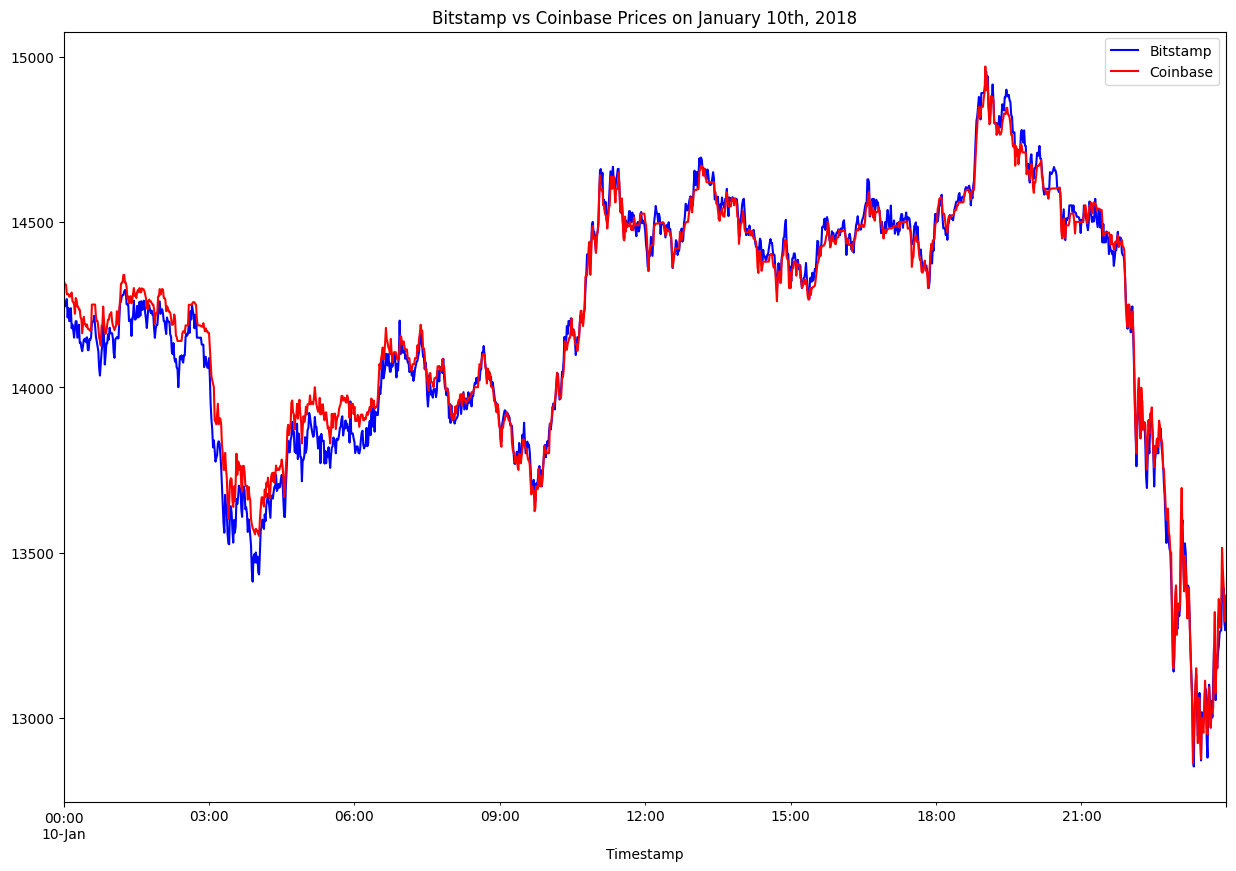

In [82]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-01-10'].plot(legend=True, kind='line', figsize=(15,10), color="blue",  title="Bitstamp vs Coinbase Prices on January 10th, 2018", label="Bitstamp")
coinbase_sliced.loc['2018-01-10'].plot(legend=True, kind='line', figsize=(15,10), color="red",  label="Coinbase")

In [83]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_jan = coinbase_sliced.loc['2018-01-10'] - bitstamp_sliced.loc['2018-01-10']

# Generate summary statistics for the early DataFrame
arbitrage_spread_jan.describe()

count    1440.000000
mean       15.978826
std        45.869721
min       -78.810000
25%       -17.787500
50%         6.880000
75%        46.530000
max       192.000000
Name: Close, dtype: float64

<AxesSubplot: title={'center': 'Arbitrage Spread from January Sample'}>

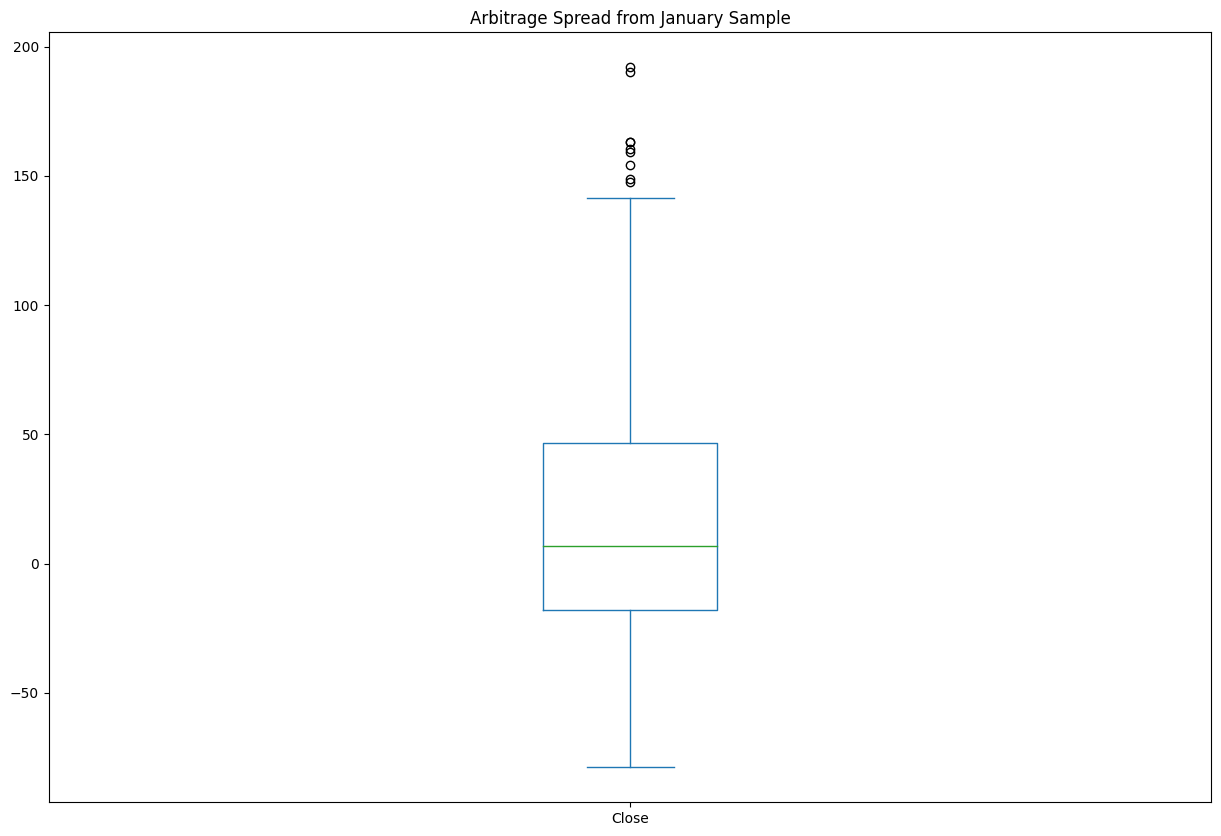

In [84]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_jan.plot( kind='box', figsize=(15,10), title="Arbitrage Spread from January Sample")

<AxesSubplot: title={'center': 'Bitstamp vs Coinbase Prices on February 24th, 2018'}, xlabel='Timestamp'>

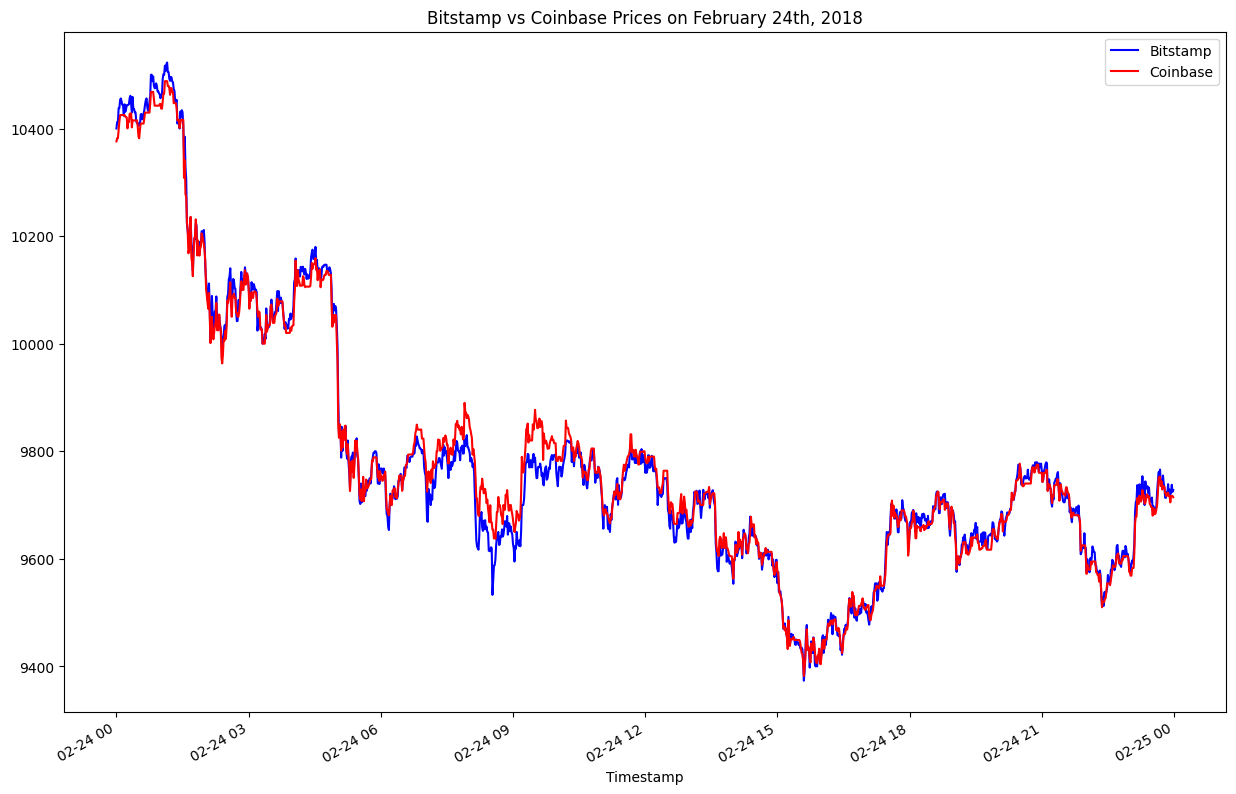

In [85]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-02-24'].plot(legend=True, kind='line', figsize=(15,10), color="blue",  title="Bitstamp vs Coinbase Prices on February 24th, 2018", label="Bitstamp")
coinbase_sliced.loc['2018-02-24'].plot(legend=True, kind='line', figsize=(15,10), color="red",  label="Coinbase")

In [86]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_feb = coinbase_sliced.loc['2018-02-24'] - bitstamp_sliced.loc['2018-02-24']

# Generate summary statistics 
arbitrage_spread_feb.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<AxesSubplot: title={'center': 'Arbitrage Spread from February Sample'}>

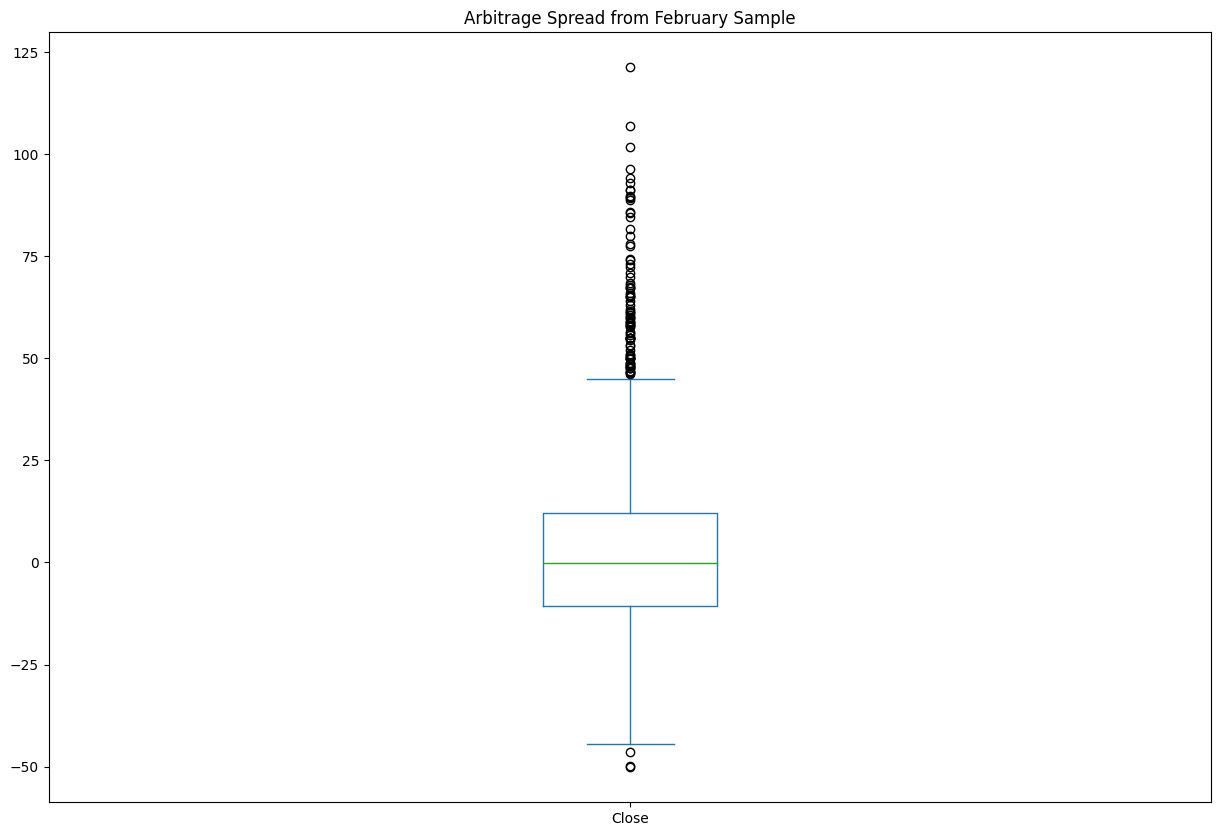

In [87]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_feb.plot( kind='box', figsize=(15,10), title="Arbitrage Spread from February Sample")

<AxesSubplot: title={'center': 'Bitstamp vs Coinbase Prices on March 10th, 2018'}, xlabel='Timestamp'>

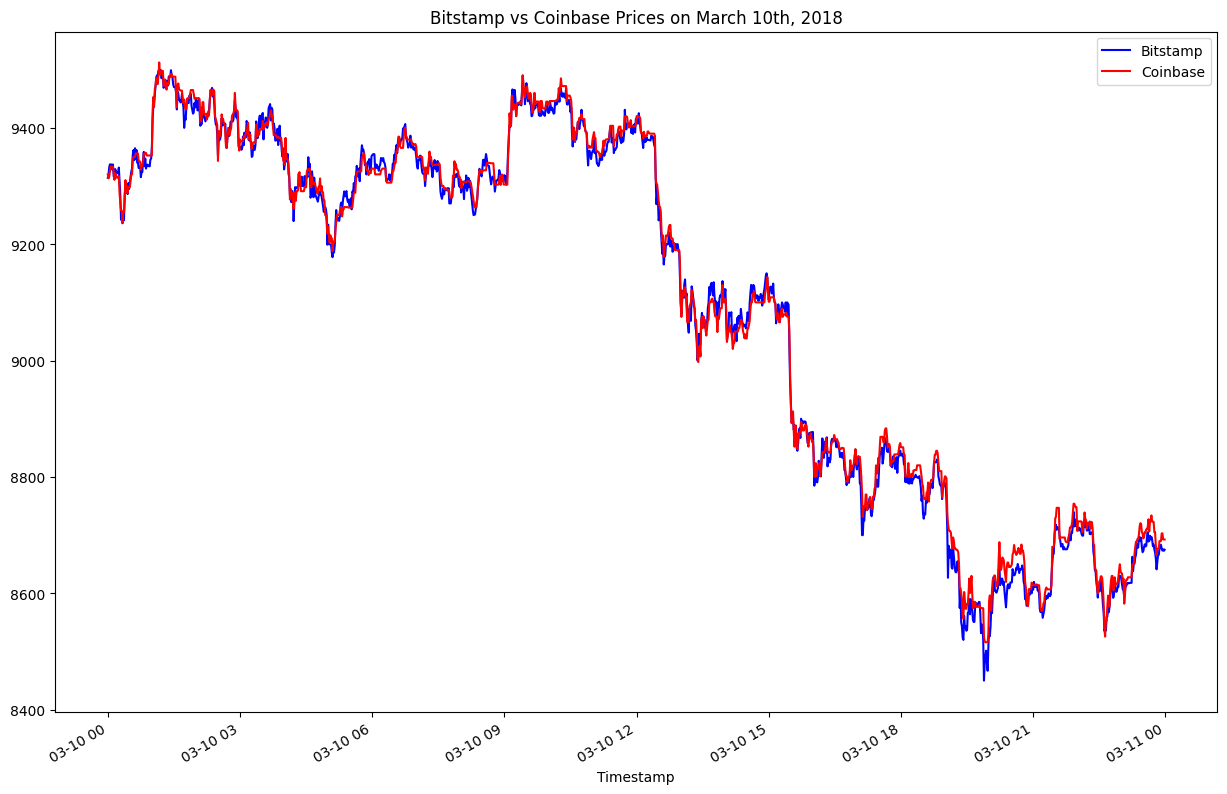

In [88]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-03-10'].plot(legend=True, kind='line', figsize=(15,10), color="blue",  title="Bitstamp vs Coinbase Prices on March 10th, 2018", label="Bitstamp")
coinbase_sliced.loc['2018-03-10'].plot(legend=True, kind='line', figsize=(15,10), color="red",  label="Coinbase")

In [89]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_mar = coinbase_sliced.loc['2018-03-10'] - bitstamp_sliced.loc['2018-03-10']

# Generate summary statistics for the late DataFrame
arbitrage_spread_mar.describe()

count    1433.000000
mean        6.541417
std        15.953638
min       -36.860000
25%        -4.240000
50%         7.170000
75%        16.040000
max        93.180000
Name: Close, dtype: float64

<AxesSubplot: title={'center': 'Arbitrage Spread from March Sample'}>

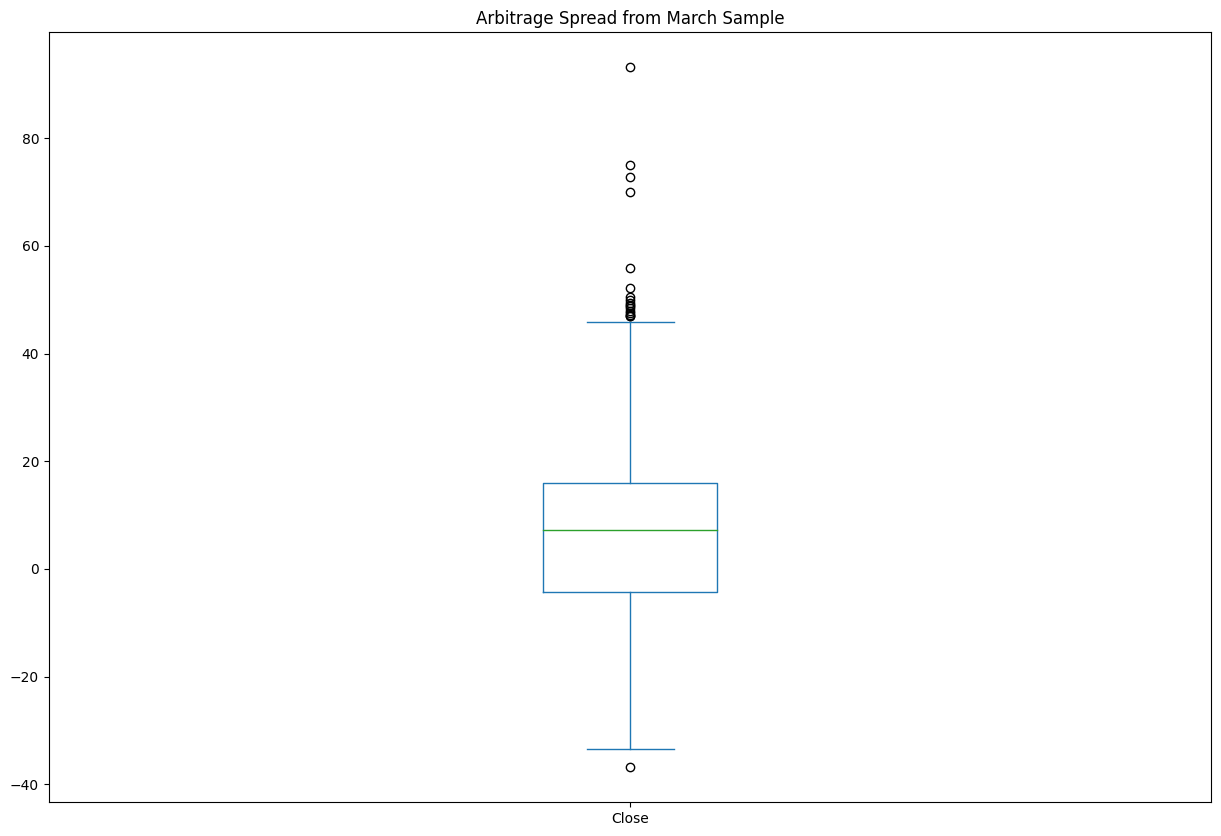

In [90]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_mar.plot( kind='box', figsize=(15,10), title="Arbitrage Spread from March Sample")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [91]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_jan = coinbase_sliced.loc['2018-01-10'] - bitstamp_sliced.loc['2018-01-10']
arbitrage_spread_feb = coinbase_sliced.loc['2018-02-24'] - bitstamp_sliced.loc['2018-02-24']
arbitrage_spread_mar = coinbase_sliced.loc['2018-03-10'] - bitstamp_sliced.loc['2018-03-10']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_jan.describe()

count    1440.000000
mean       15.978826
std        45.869721
min       -78.810000
25%       -17.787500
50%         6.880000
75%        46.530000
max       192.000000
Name: Close, dtype: float64

In [92]:
arbitrage_spread_feb.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

In [93]:
arbitrage_spread_mar.describe()

count    1433.000000
mean        6.541417
std        15.953638
min       -36.860000
25%        -4.240000
50%         7.170000
75%        16.040000
max        93.180000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [94]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_jan = arbitrage_spread_jan[arbitrage_spread_jan > 0] / bitstamp_sliced.loc['2018-01-10']
spread_return_feb = arbitrage_spread_feb[arbitrage_spread_feb > 0] / bitstamp_sliced.loc['2018-02-24']
spread_return_mar = arbitrage_spread_mar[arbitrage_spread_mar > 0] / bitstamp_sliced.loc['2018-03-10']

# Review the spread return DataFrame
spread_return_jan.head()

Timestamp
2018-01-10 00:00:00    0.001297
2018-01-10 00:01:00    0.005037
2018-01-10 00:02:00    0.003852
2018-01-10 00:03:00    0.004211
2018-01-10 00:04:00    0.001005
Name: Close, dtype: float64

In [95]:
spread_return_feb.head()

Timestamp
2018-02-24 00:00:00   NaN
2018-02-24 00:01:00   NaN
2018-02-24 00:02:00   NaN
2018-02-24 00:03:00   NaN
2018-02-24 00:04:00   NaN
Name: Close, dtype: float64

In [96]:
spread_return_mar.head()

Timestamp
2018-03-10 00:00:00    0.000631
2018-03-10 00:01:00         NaN
2018-03-10 00:02:00         NaN
2018-03-10 00:03:00         NaN
2018-03-10 00:04:00         NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [97]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_jan = spread_return_jan[spread_return_jan > .01]
profitable_trades_feb = spread_return_feb[spread_return_feb > .01]
profitable_trades_mar = spread_return_mar[spread_return_mar > .01]

# Review the first five profitable trades
profitable_trades_jan.head()

Timestamp
2018-01-10 02:22:00    0.010001
2018-01-10 03:04:00    0.010719
2018-01-10 03:05:00    0.013895
2018-01-10 03:06:00    0.011597
2018-01-10 03:17:00    0.011663
Name: Close, dtype: float64

In [98]:
profitable_trades_feb.head()

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

In [99]:
profitable_trades_mar.head()

Timestamp
2018-03-10 19:04:00    0.010801
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [100]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_jan.describe()

count    14.000000
mean      0.011375
std       0.001300
min       0.010001
25%       0.010540
50%       0.010963
75%       0.011913
max       0.014012
Name: Close, dtype: float64

In [101]:
profitable_trades_feb.describe()

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

In [102]:
profitable_trades_mar.describe()

count    1.000000
mean     0.010801
std           NaN
min      0.010801
25%      0.010801
50%      0.010801
75%      0.010801
max      0.010801
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [103]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_jan = profitable_trades_jan * bitstamp_sliced.loc['2018-01-10']

# Drop any missing values from the profit DataFrame
profit_per_trade_jan = profit_jan.dropna()

# View the early profit DataFrame
profit_per_trade_jan

Timestamp
2018-01-10 02:22:00    140.01
2018-01-10 03:04:00    148.70
2018-01-10 03:05:00    192.00
2018-01-10 03:06:00    160.49
2018-01-10 03:17:00    159.10
2018-01-10 03:18:00    163.00
2018-01-10 03:19:00    190.00
2018-01-10 03:34:00    137.13
2018-01-10 03:53:00    141.01
2018-01-10 03:54:00    163.00
2018-01-10 05:00:00    138.89
2018-01-10 05:18:00    147.64
2018-01-10 05:25:00    154.28
2018-01-10 23:50:00    141.35
Name: Close, dtype: float64

In [104]:
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_feb = profitable_trades_feb * bitstamp_sliced.loc['2018-02-24']

# Drop any missing values from the profit DataFrame
profit_per_trade_feb = profit_feb.dropna()

# View the early profit DataFrame
profit_per_trade_feb

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64

In [105]:
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_mar = profitable_trades_mar * bitstamp_sliced.loc['2018-03-10']

# Drop any missing values from the profit DataFrame
profit_per_trade_mar = profit_mar.dropna()

# View the early profit DataFrame
profit_per_trade_mar

Timestamp
2018-03-10 19:04:00    93.18
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [106]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_jan.describe()

count     14.000000
mean     155.471429
std       17.641360
min      137.130000
25%      141.095000
50%      151.490000
75%      162.372500
max      192.000000
Name: Close, dtype: float64

<AxesSubplot: title={'center': 'Profit Per Trade on January 10th'}, xlabel='Timestamp'>

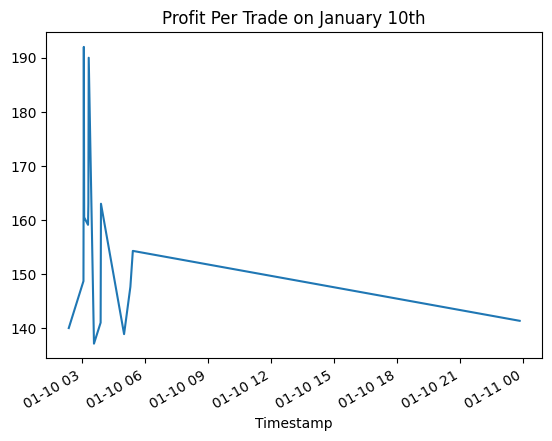

In [107]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_jan.plot(title="Profit Per Trade on January 10th")

In [108]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_feb.describe()

count      3.000000
mean     110.023333
std       10.129246
min      101.750000
25%      104.375000
50%      107.000000
75%      114.160000
max      121.320000
Name: Close, dtype: float64

<AxesSubplot: title={'center': 'Profit Per Trade on February 24th'}, xlabel='Timestamp'>

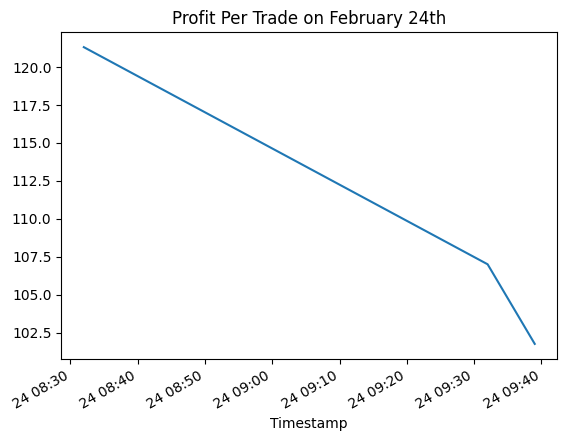

In [109]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_feb.plot(title="Profit Per Trade on February 24th")

In [110]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_mar.describe()

count     1.00
mean     93.18
std        NaN
min      93.18
25%      93.18
50%      93.18
75%      93.18
max      93.18
Name: Close, dtype: float64

<AxesSubplot: title={'center': 'Profit Per Trade on March 10th'}, xlabel='Timestamp'>

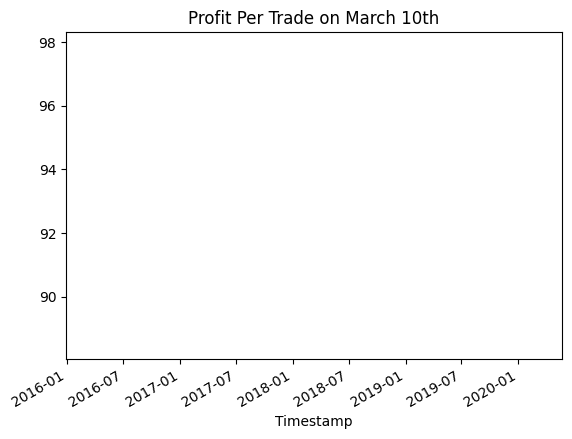

In [111]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_mar.plot(title="Profit Per Trade on March 10th")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [112]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_jan = profit_per_trade_jan.sum()
profit_sum_jan

2176.600000000002

In [113]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_feb = profit_per_trade_feb.sum()
profit_sum_feb

330.0699999999997

In [114]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_sum_mar = profit_per_trade_mar.sum()
profit_sum_mar

93.18000000000029

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [115]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_jan = profit_per_trade_jan.cumsum()

<AxesSubplot: title={'center': 'Cumulative Sum of Profit from January 10th'}, xlabel='Timestamp'>

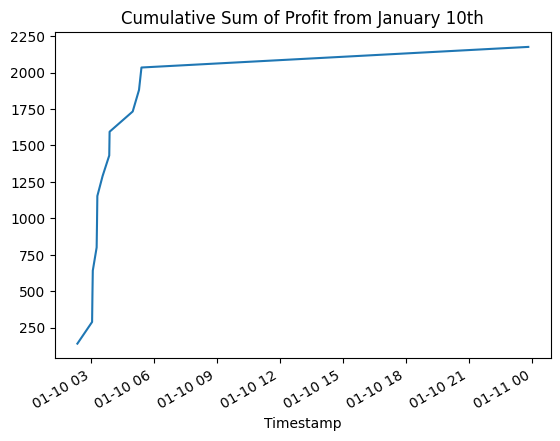

In [116]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_jan.plot( title="Cumulative Sum of Profit from January 10th")

In [117]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_feb = profit_per_trade_feb.cumsum()

<AxesSubplot: title={'center': 'Cumulative Sum of Profit from February 24th'}, xlabel='Timestamp'>

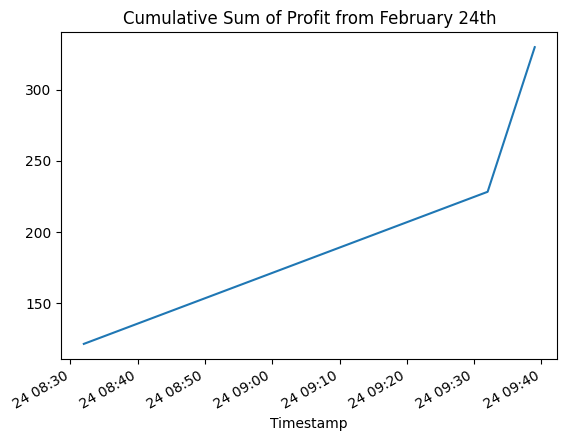

In [118]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_feb.plot( title="Cumulative Sum of Profit from February 24th")

In [119]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_mar = profit_per_trade_mar.cumsum()

<AxesSubplot: title={'center': 'Cumulative Sum of Profit from March 10th'}, xlabel='Timestamp'>

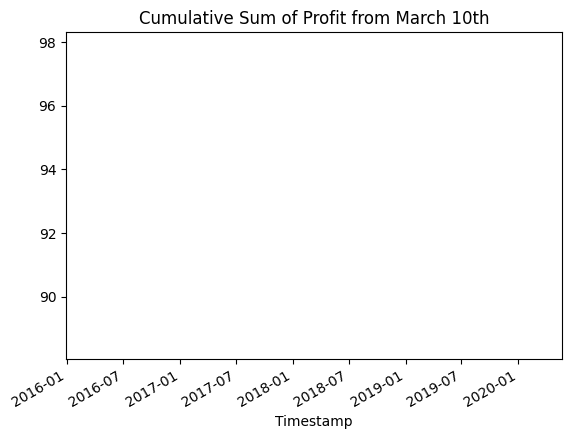

In [120]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_mar.plot( title="Cumulative Sum of Profit from March 10th")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** In January, I was able to find a day with potential profits of over $2000 on my first attempt. I tried a couple other dates in January and each had opportunity to make money taking advantage of arbitrage between the two exchanges. Moving on to February and March, such was not the case. I tried many dates in each month, finally landing on one in Feb that had 3 positive trade opportunities that could have net about $300 with this strategy and one in March that had only one trade that could net about $90. I believe this to be due to the large increase in crypto adoption over these couple months. In under 100 days time, the arbitrage opportunities between exchanges essentially went to zero.